In [ ]:
"external/kallisto" index -i "output/kallisto/human.idx" "files/Homo_sapiens.GRCh38.cdna.all.fa"
"external/kallisto" quant -i "output/kallisto/human.idx" -o "output/kallisto/" --single -l 200 -s 20 "files/SRR3534129.fastq"

"external/kallisto" quant -i "output/kallisto/human.idx" -o "output/kallisto/" "files/SRR10345833_1.fastq" "files/SRR10345833_1.fastq"

"target/release/tempest" --index -f "files/Homo_sapiens.GRCh38.cdna.all.fa" -k 30 -o "output/myindex_24.idx"


In [ ]:
"external/kallisto" index -i "output/kallisto/human_syn.idx" "../synthetic/Homo_sapiens.GRCh38.cdna.all.fa"
"external/kallisto" quant -i "output/kallisto/human_syn.idx" -t 8 -o "output/kallisto/" --single -l 200 -s 20 "../synthetic/syndata.fastq"

In [86]:
import pandas as pd
import os

print(os.getcwd())

origout = pd.read_csv("../../synthetic/data/399099-7RRLpDCCvUDn_kallisto.tsv", sep="\t")
kallisto_out = pd.read_csv("../output/kallisto/abundance.tsv", sep="\t")
tempest_out = pd.read_csv("../output/counts_syn_31_0.tsv", sep="\t", header=None)
tempest_out = pd.read_csv("../output/counts_step_0.tsv", sep="\t", header=None)

origout.index = origout.iloc[:,0]
kallisto_out.index = [x.split(".")[0] for x in kallisto_out.iloc[:,0]]
tempest_out.index = [x.split(".")[0] for x in tempest_out.iloc[:,0]]

sum(kallisto_out.iloc[:,3])

/Users/maayanlab/Documents/GitHub/contialign/tempest/test


11081520.364171682

Orig vs Kallisto correlation 0.895651239697601
Orig vs Zen correlation 0.8662314425190033
Kallisto vs Zen correlation 0.9178808584725436


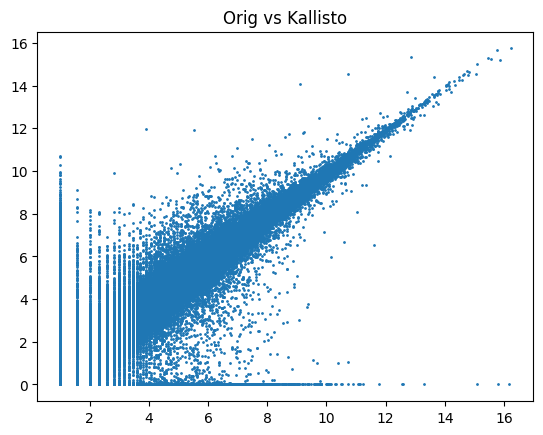

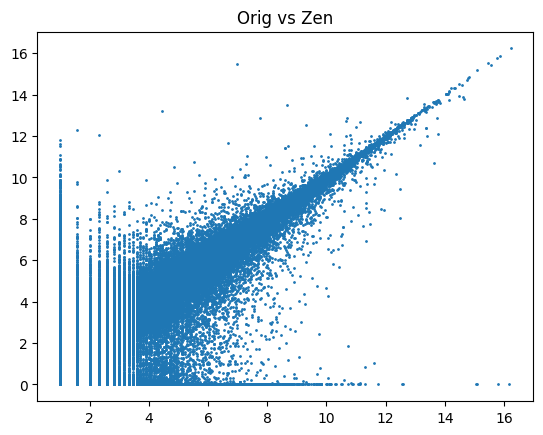

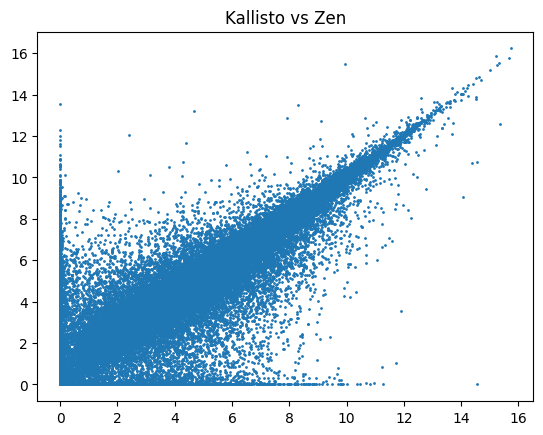

In [87]:
from matplotlib import pyplot as plt
import numpy as np

inter = origout.index.intersection(tempest_out.index)

plt.figure(0)
plt.scatter(np.log2(1+origout.iloc[:,1]+1),np.log2(kallisto_out.iloc[:,3]+1), s=1)
plt.title("Orig vs Kallisto")
print("Orig vs Kallisto correlation", np.corrcoef(np.log2(1+origout.iloc[:,1]+1),np.log2(kallisto_out.iloc[:,3]+1))[0,1])

plt.figure(1)
plt.scatter(np.log2(1+origout.iloc[:,1].loc[inter]+1),np.log2(tempest_out.iloc[:,1].loc[inter]+1), s=1)
plt.title("Orig vs Zen")
print("Orig vs Zen correlation", np.corrcoef(np.log2(1+origout.iloc[:,1].loc[inter]+1),np.log2(tempest_out.iloc[:,1].loc[inter]+1))[0,1])

plt.figure(2)
plt.scatter(np.log2(kallisto_out.iloc[:,3].loc[inter]+1), np.log2(tempest_out.iloc[:,1].loc[inter]+1), s=1)
plt.title("Kallisto vs Zen")
print("Kallisto vs Zen correlation", np.corrcoef(np.log2(kallisto_out.iloc[:,3].loc[inter]+1),np.log2(tempest_out.iloc[:,1].loc[inter]+1))[0,1])


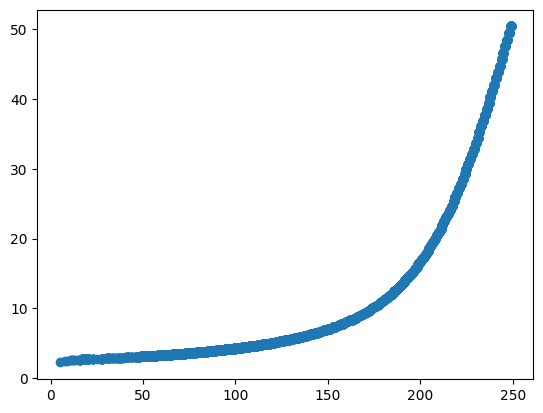

In [91]:
ww = np.where(kallisto_out.iloc[:,1] < 250)[0]

plt.scatter(kallisto_out.iloc[ww,1], kallisto_out.iloc[ww,2])

correlation 0.9299250857464652


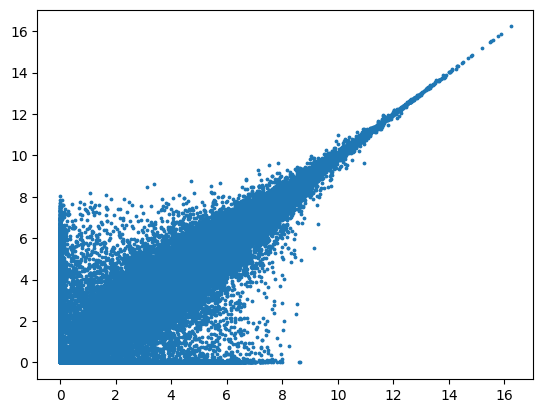

In [58]:
tempest_out_0 = pd.read_csv("../output/counts_syn_31_0.tsv", sep="\t", header=None)
tempest_out_00 = pd.read_csv("../output/counts_syn_31_00.tsv", sep="\t", header=None)
tempest_out_1 = pd.read_csv("../output/counts_syn_31_1.tsv", sep="\t", header=None)
tempest_out_5 = pd.read_csv("../output/counts_syn_31_5.tsv", sep="\t", header=None)
print("correlation", np.corrcoef(np.log2(1+tempest_out_0.iloc[:,1]+1),np.log2(tempest_out_00.iloc[:,1]+1))[0,1])

plt.scatter(np.log2(tempest_out_0.iloc[:,1]+1), np.log2(tempest_out_00.iloc[:,1]+1), s=3)

In [50]:
tempest_out_0

,0,1
0,ENST00000631435.1,0.000000
1,ENST00000415118.1,0.000000
2,ENST00000448914.1,0.000000
3,ENST00000434970.2,0.000000
4,ENST00000632684.1,0.000000
...,...,...
205536,ENST00000416718.2,3.238461
205537,ENST00000445254.1,0.000000
205538,ENST00000441281.1,0.000000
205539,ENST00000614199.1,0.000000


In [ ]:

plt.scatter(np.log2(synout.iloc[:,3].loc[inter]+1), np.log2(tempestout.iloc[:,1].loc[inter]+1), s=1)
print("correlation", np.corrcoef(np.log2(synout.iloc[:,3].loc[inter]+1),np.log2(tempestout.iloc[:,1].loc[inter]+1))[0,1])


In [ ]:
"target/release/tempest" --index -f "../synthetic/Homo_sapiens.GRCh38.cdna.all.fa" -k 22 -o "output/syn.idx"
"target/release/tempest" -f "../synthetic/syndata.fastq" -t 8 -o "output/counts_syn.tsv" -x "output/syn.idx"


In [2]:
import pandas as pd

c1 = pd.read_csv("../output/kallisto/abundance.tsv", sep="\t", header=None)
c1.index = c1.iloc[:,0]

c2 = pd.read_csv("../output/kallisto/abundance_1.tsv", sep="\t", header=None)
c2.index = c2.iloc[:,0]

/var/folders/r_/yj45vq792mz5r83pxxqhdz640000gn/T/ipykernel_27205/1235413552.py:3: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  c1 = pd.read_csv("../output/kallisto/abundance.tsv", sep="\t", header=None)
/var/folders/r_/yj45vq792mz5r83pxxqhdz640000gn/T/ipykernel_27205/1235413552.py:5: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  c2 = pd.read_csv("../output/kallisto/abundance_1.tsv", sep="\t", header=None)


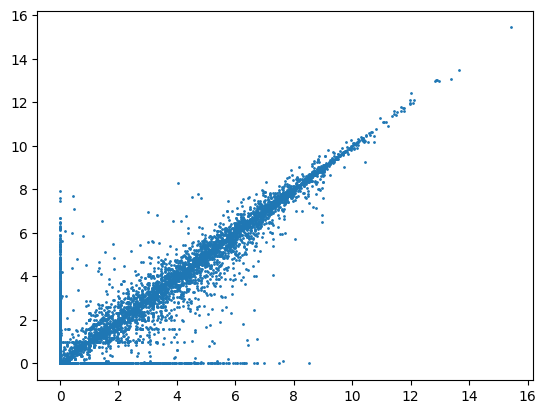

In [19]:
from matplotlib import pyplot as plt
import numpy as np

plt.scatter(np.log2(1+c1.iloc[1:,3].astype("float")), np.log2(1+c2.iloc[1:,3].astype("float")), s=1)

In [10]:
c2.iloc[1:,3].astype("float")

0
ENST00000631435.1     0.0000
ENST00000415118.1     0.0000
ENST00000448914.1     0.0000
ENST00000434970.2     0.0000
ENST00000632684.1     0.0000
                      ...   
ENST00000416718.2    18.0418
ENST00000445254.1     0.0000
ENST00000441281.1     0.0000
ENST00000614199.1     0.0000
ENST00000503096.1     0.0000
Name: 3, Length: 205541, dtype: float64

In [14]:
diff = np.log2(1+c1.iloc[1:,3].astype("float")) - np.log2(1+c2.iloc[1:,3].astype("float"))

In [16]:
len(np.where(np.abs(diff) > 2)[0])

618

In [20]:
np.corrcoef(np.log2(1+c1.iloc[1:,3].astype("float")), np.log2(1+c2.iloc[1:,3].astype("float")))

array([[1.        , 0.96566567],
       [0.96566567, 1.        ]])